In [3]:
# Step 1: Setup Kaggle API for Dataset Download

!mkdir -p ~/.kaggle # Create hidden directory for Kaggle API key
!cp kaggle.json ~/.kaggle/  # Copy Kaggle API JSON key to access Kaggle datasets


cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
# Step 2: Download the "Dogs vs. Cats" dataset from Kaggle

!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [5]:
# Step 3: Extract the downloaded dataset

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')# Open the zip file
zip_ref.extractall('/content')  # Extract files to the /content directory
zip_ref.close()

In [6]:
# Step 4: Import TensorFlow and Keras Libraries


import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [7]:
# Step 5: Load Pre-trained VGG16 Model
# Include only convolutional base (no dense layers) and specify input shape
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
# Step 6: Enable Fine-Tuning for Layers Starting from 'block5_conv1'

conv_base.trainable = True # Allow fine-tuning
 
set_trainable = False  # Initially freeze all layers
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':  # Start fine-tuning from this layer
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Verify which layers are trainable

for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [9]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [10]:
# Step 7: Build the Complete Model

model = Sequential()

model.add(conv_base)  # Add VGG16 convolutional base
model.add(Flatten())  # Flatten the extracted features
model.add(Dense(256, activation='relu'))  # Add fully connected dense layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [11]:
#generators
# Step 8: Load and Preprocess Training and Validation Datasets

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',  # Path to training dataset
    labels='inferred',          # Infer labels from subdirectory names
    label_mode='int',           # Integer labels (binary classification)
    batch_size=32,              # Batch size
    image_size=(150, 150)       # Resize images to 150x150
)

validation_ds = keras.utils.image_dataset_from_directory(
     directory='/content/test',  # Path to validation dataset
    labels='inferred',          # Infer labels from subdirectory names
    label_mode='int',           # Integer labels (binary classification)
    batch_size=32,              # Batch size
    image_size=(150, 150)       # Resize images to 150x150
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Step 9: Normalize the Dataset
# Function to normalize pixel values to range [0, 1]

def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

# Apply normalization to datasets

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# Step 10: Compile the Model

model.compile(
   optimizer=keras.optimizers.RMSprop(learning_rate=1e-05),  # Low learning rate for fine-tuning
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']         # Track accuracy during training
)


In [14]:
# Step 11: Train the Model

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 103ms/step - accuracy: 0.8583 - loss: 0.3255 - val_accuracy: 0.9134 - val_loss: 0.2002
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 99ms/step - accuracy: 0.9451 - loss: 0.1438 - val_accuracy: 0.9442 - val_loss: 0.1414
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.9616 - loss: 0.1016 - val_accuracy: 0.9454 - val_loss: 0.1357
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9735 - loss: 0.0718 - val_accuracy: 0.9458 - val_loss: 0.1334
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9828 - loss: 0.0493 - val_accuracy: 0.9520 - val_loss: 0.1251
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9913 - loss: 0.0330 - val_accuracy: 0.9530 - val_loss: 0.1321
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9952 - loss: 0.0211 - val_accuracy: 0.9510 - val_loss: 0.1417
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9968 - loss: 0.0141

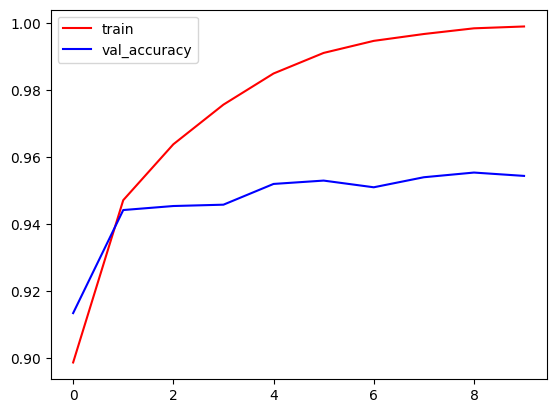

In [15]:
# Step 12: Visualize Training and Validation Accuracy

import matplotlib.pyplot as plt

# Plot accuracy

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label = 'val_accuracy')
plt.legend()
plt.show()

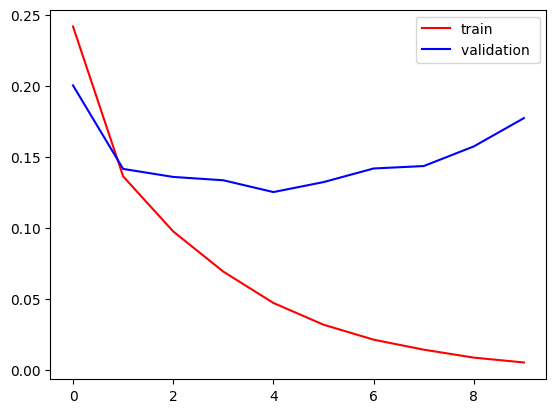

In [16]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label = 'validation ')
plt.legend()
plt.show()